In [66]:
import pandas as pd

In [67]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [68]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [69]:
have_you_seen = "Have you seen any of the 6 films in the Star Wars franchise?"

In [70]:
do_you_consider = "Do you consider yourself to be a fan of the Star Wars film franchise?"

In [71]:
star_wars[have_you_seen] = star_wars[have_you_seen].map({"Yes": True, "No": False})

In [72]:
star_wars[do_you_consider] = star_wars[do_you_consider].map({"Yes": True, "No": False})

In [73]:
star_wars_title_columns = star_wars.columns[3:9]

seen_transformations = {"Star Wars: Episode I  The Phantom Menace": True,
                        "Star Wars: Episode II  Attack of the Clones": True,
                        "Star Wars: Episode III  Revenge of the Sith": True,
                        "Star Wars: Episode IV  A New Hope": True,
                        "Star Wars: Episode V The Empire Strikes Back": True,
                        "Star Wars: Episode VI Return of the Jedi": True,
                        "NaN": False}

for column in star_wars_title_columns:
    star_wars[column] = star_wars[column].map(seen_transformations)

In [74]:
new_star_wars_title_columns = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                               "Unnamed: 4": "seen_2",
                               "Unnamed: 5": "seen_3",
                               "Unnamed: 6": "seen_4",
                               "Unnamed: 7": "seen_5",
                               "Unnamed: 8": "seen_6"}

star_wars = star_wars.rename(columns=new_star_wars_title_columns)

In [82]:
star_wars[star_wars.columns[9:15]].head(5)

star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
                          "Unnamed: 10": "ranking_2",
                          "Unnamed: 11": "ranking_3",
                          "Unnamed: 12": "ranking_4",
                          "Unnamed: 13": "ranking_5",
                          "Unnamed: 14": "ranking_6"})

In [88]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float) 

In [98]:
ranking_columns = star_wars.columns[9:15]
ranking_means = ranking_columns.map(lambda c: star_wars[c].mean())

In [99]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

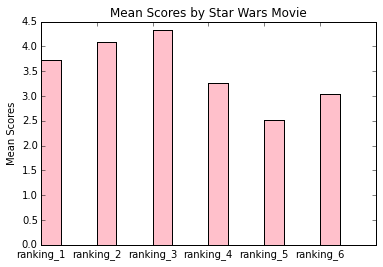

In [100]:
ind = np.arange(6)

fig, ax = plt.subplots()
rects = ax.bar(ind, ranking_means, 0.35, color="pink")
ax.set_ylabel("Mean Scores")
ax.set_title("Mean Scores by Star Wars Movie")
ax.set_xticks(ind)
ax.set_xticklabels(ranking_columns)

plt.show()

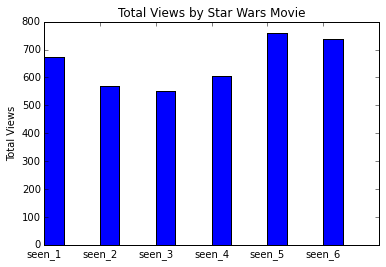

In [104]:
seen_columns = star_wars.columns[3:9]
seen_sums = seen_columns.map(lambda c: star_wars[c].sum())

fig, ax = plt.subplots()
rects2 = ax.bar(ind, seen_sums, 0.35, color="blue")
ax.set_ylabel("Total Views")
ax.set_title("Total Views by Star Wars Movie")
ax.set_xticks(ind)
ax.set_xticklabels(seen_columns)

plt.show()

I'd guess that the number of views for each movie is inversely correlated to the mean score for each movie because the worse a movie is, the fewer number of people who see it.

In [106]:
men = star_wars[star_wars["Gender"] == "Male"]
women = star_wars[star_wars["Gender"] == "Female"]

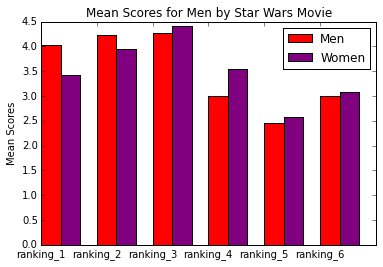

In [111]:
men_ranking_means = ranking_columns.map(lambda c: men[c].mean())
women_ranking_means = ranking_columns.map(lambda c: women[c].mean())

fix, ax = plt.subplots()
rects1 = ax.bar(ind, men_ranking_means, 0.35, color="red")
rects2 = ax.bar(ind + 0.35, women_ranking_means, 0.35, color="purple")
ax.set_ylabel("Mean Scores")
ax.set_title("Mean Scores for Men by Star Wars Movie")
ax.set_xticks(ind)
ax.set_xticklabels(ranking_columns)

ax.legend((rects1[0], rects2[0]), ("Men", "Women"))

plt.show()

Men and women ranked movies in approximately the same order. However, women liked the first and second movies less than men and liked the other movies more than men.